## 과제 2-1. 팀 별로 정해진 모델에 맞게 분류 모델 만들어오기
- 모델의 장단점 및 해당 모델에 맞는 특성공학 기법을 정리한 뒤, 해당 모델에 맞는 특성공학 기법을 적용해야 함
- 사용할 데이터 : 오늘 수업 때 배운 diabetes.csv
- 1조 : 랜덤포레스트, 2조 : Gradient Boosting

## 과제 2-2. (기본) 5. 회귀모델 만들기 예습

Random forest  
하나의 결정트리가 모든 feature를 변수로 사용해서 y값을 예측한다면 앞서 말한대로 오버피팅 문제가 발생한다. 그래서 랜덤포레스트는 feature를 무작위로 뽑거나, 데이터를 무작위로 뽑아서 여러개의 작은 트리를 만들고 그 트리들을 결합한다.

n_estimators: 트리를 몇 개 만들 것인지 (int, default=100), 값이 클수록 오버피팅 방지

criterion: gini 또는 entropy 중 선택

max_depth: 트리의 깊이 (int, default=None)

bootstrap: True이면 전체 feature에서 복원추출해서 트리 생성 (default=True)

max_features: 선택할 feature의 개수, 보통 default값으로 씀 (default='auto')

In [1]:
#필요한 라이브러리 로드
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
#시각화를 위한 seaborn, matplotlib.pyplot 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df= pd.read_csv("C:/Users/강태희/Documents/data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
X=df[['Pregnancies', 'Glucose',	'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction', 'Age']]
Y=df['Outcome']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,random_state=42)

In [13]:
from sklearn.ensemble import RandomForestClassifier 

In [14]:
model=RandomForestClassifier()

In [15]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [17]:
y_predict= model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [18]:
proba1 = model.predict_proba(X_test)
proba1

array([[0.47, 0.53],
       [0.78, 0.22],
       [0.85, 0.15],
       [0.81, 0.19],
       [0.5 , 0.5 ],
       [0.36, 0.64],
       [1.  , 0.  ],
       [0.36, 0.64],
       [0.46, 0.54],
       [0.38, 0.62],
       [0.76, 0.24],
       [0.2 , 0.8 ],
       [0.76, 0.24],
       [0.47, 0.53],
       [0.99, 0.01],
       [0.56, 0.44],
       [0.9 , 0.1 ],
       [0.94, 0.06],
       [0.34, 0.66],
       [0.52, 0.48],
       [0.73, 0.27],
       [0.91, 0.09],
       [0.68, 0.32],
       [0.99, 0.01],
       [0.41, 0.59],
       [0.11, 0.89],
       [0.93, 0.07],
       [0.99, 0.01],
       [0.79, 0.21],
       [0.81, 0.19],
       [0.28, 0.72],
       [0.31, 0.69],
       [0.24, 0.76],
       [0.24, 0.76],
       [0.52, 0.48],
       [0.23, 0.77],
       [0.18, 0.82],
       [0.55, 0.45],
       [0.85, 0.15],
       [0.27, 0.73],
       [0.94, 0.06],
       [0.62, 0.38],
       [0.31, 0.69],
       [0.45, 0.55],
       [0.95, 0.05],
       [0.3 , 0.7 ],
       [0.41, 0.59],
       [0.75,

### 예측의 정확도 측정하기

In [24]:
y_predict
Y_test - y_predict


# 만든 모델이 얼마나 활용이 가능한지 확인하고 싶을 때
# 실제값 - 예측값을 빼주면 같은 값은 0으로 출력
# 여기에서 절댓값을 씌운 값이 1인 값이 다르게 예측한 값이 된다

668   -1
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594   -1
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

In [25]:
abs(Y_test - y_predict).sum() / len(Y_test)

0.28125

In [27]:
diff_count = abs(Y_test - y_predict).sum() 
diff_count

54

In [28]:
#예측의 정확도 구하기

(len(Y_test) - diff_count) / len(Y_test) * 100

71.875

In [19]:
model.feature_importances_

array([0.08314003, 0.25473658, 0.09061828, 0.07218252, 0.06587325,
       0.17352744, 0.11623247, 0.14368943])

<Axes: ylabel='None'>

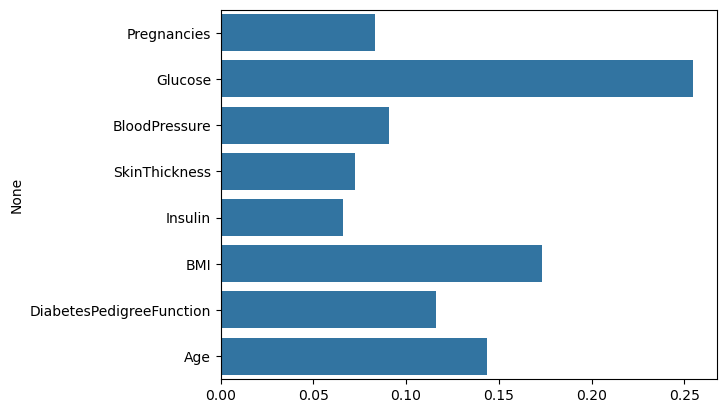

In [22]:
sns.barplot(x=model.feature_importances_, y=X.columns)